<a href="https://colab.research.google.com/github/juniorPalomino25/Python/blob/main/DL07VerificacionAutomatica_sonar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descripción: Para el conjunto de datos sonar.csv realizaremos validación automática

# Importar Librerías

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

Reemplazaremos el valor de R y M por 1 y 0 respectivamente

# Cargar los datos

In [2]:
datos = numpy.loadtxt("sonar_transformado_R_M.txt",delimiter=",")

Dividir la entrada (X) y la salida (y)

In [3]:
X = datos[:,0:60]

In [4]:
y = datos[:,60]

# Crear el modelo

In [5]:
modelo = Sequential()
modelo.add(Dense(12, input_dim=60, activation='relu'))
modelo.add(Dense(30,activation='relu'))
modelo.add(Dense(1,activation='sigmoid'))

# Compilar el modelo

In [6]:
modelo.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Entrenar el modelo

La verificación automática se define con validation_split

In [7]:
historia = modelo.fit(X, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
14/14 [==============================] - 1s 36ms/step - loss: 0.6785 - accuracy: 0.6115 - val_loss: 0.8048 - val_accuracy: 0.0000e+00
Epoch 2/150
14/14 [==============================] - 0s 9ms/step - loss: 0.6437 - accuracy: 0.6978 - val_loss: 0.9105 - val_accuracy: 0.0000e+00
Epoch 3/150
14/14 [==============================] - 0s 10ms/step - loss: 0.6243 - accuracy: 0.6978 - val_loss: 1.0094 - val_accuracy: 0.0000e+00
Epoch 4/150
14/14 [==============================] - 0s 10ms/step - loss: 0.6072 - accuracy: 0.6978 - val_loss: 1.0732 - val_accuracy: 0.0000e+00
Epoch 5/150
14/14 [==============================] - 0s 8ms/step - loss: 0.5903 - accuracy: 0.6978 - val_loss: 1.0741 - val_accuracy: 0.0000e+00
Epoch 6/150
14/14 [==============================] - 0s 10ms/step - loss: 0.5721 - accuracy: 0.6978 - val_loss: 1.1434 - val_accuracy: 0.0000e+00
Epoch 7/150
14/14 [==============================] - 0s 11ms/step - loss: 0.5524 - accuracy: 0.6906 - val_loss: 1.1770 - val_a

# Graficar la historia

In [8]:
# Función para graficar la historia

EPOCAS = 150
import numpy as np
import matplotlib.pyplot as plt
def graficar(h):
  LOSS = 0; ACCURACY = 1
  entrenamiento = np.zeros((2,EPOCAS));
  prueba = np.zeros((2,EPOCAS));
  entrenamiento[LOSS] = h.history['loss'] # loss de entrenamiento
  prueba[LOSS] = h.history['val_loss'] # loss de validación
  entrenamiento[ACCURACY] = h.history['accuracy'] #acc de entrenamiento
  prueba[ACCURACY] = h.history['val_accuracy'] #acc de validación
  epocas = range(1,EPOCAS+1)
  fig, axs = plt.subplots(1,2,figsize=(15,5))
  for i, label in zip((LOSS,ACCURACY),('perdida','exactitud')):
    axs[i].plot(epocas,entrenamiento[i],'b-',label='Entrenamiento '+label)
    axs[i].plot(epocas,prueba[i],'y-',label='Prueba '+label)
    axs[i].set_title('Entrenamiento y prueba ' + label)
    axs[i].set_xlabel('Epocas')
    axs[i].set_ylabel(label)
    axs[i].legend()
plt.show()

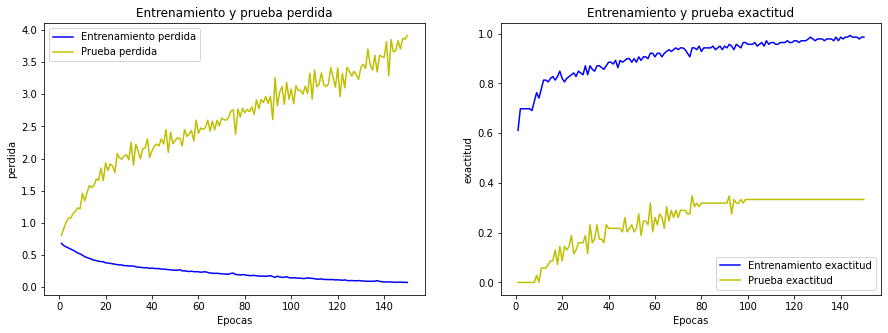

In [9]:
graficar(historia)